In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [12]:
df = pd.read_excel("./Data/data_LR_2.xlsx")

df.head()

,Unnamed: 0,Year,TeamA,TeamB,TeamA_FG_zscore,TeamA_FGA_zscore,TeamA_2P_zscore,TeamA_2PA_zscore,TeamA_3P_zscore,TeamA_3PA_zscore,...,TeamB_3PA_zscore,TeamB_FT_zscore,TeamB_FTA_zscore,TeamB_FG%_zscore,TeamB_2P%_zscore,TeamB_3P%_zscore,TeamB_FT%_zscore,TeamA_SRS,TeamB_SRS,result
0,0,2019,Duke,North Dakota St.,1.949629,1.320741,2.094006,0.542623,0.489724,0.919852,...,0.395988,-0.889213,-1.207277,0.293780,0.140931,0.517558,1.174393,0.709851,-1.606147,1
1,1,2019,VCU,UCF,-1.605961,-0.868734,-0.695939,-0.464692,-1.959867,-0.484132,...,-0.289175,-0.392476,0.376734,-2.103398,-1.538640,-1.790761,-2.918627,-0.770028,-0.427092,0
2,2,2019,Mississippi St.,Liberty,-0.551816,-1.260119,-0.458324,-0.589242,-0.341847,-0.797386,...,-0.274394,-0.572308,-0.598060,1.714265,1.741012,0.996409,0.464452,0.291783,-2.017023,0
3,3,2019,Virginia Tech,Saint Louis,-1.236185,-2.117061,-2.279128,-3.027442,1.128645,0.946198,...,-0.876447,-1.615684,-1.082457,-1.021202,-0.441936,-1.241621,-1.539388,-0.000355,-0.898120,1
4,4,2019,Maryland,Belmont,0.226582,1.007037,-0.090884,0.091227,0.562519,1.063191,...,1.423138,-0.871030,-1.041602,1.527556,1.772672,0.635841,0.341354,0.409210,-1.746914,1


In [11]:
df.columns

Index(['Unnamed: 0', 'Year', 'TeamA', 'TeamB', 'TeamA_FG_zscore',
       'TeamA_FGA_zscore', 'TeamA_2P_zscore', 'TeamA_2PA_zscore',
       'TeamA_3P_zscore', 'TeamA_3PA_zscore', 'TeamA_FT_zscore',
       'TeamA_FTA_zscore', 'TeamA_FG%_zscore', 'TeamA_2P%_zscore',
       'TeamA_3P%_zscore', 'TeamA_FT%_zscore', 'TeamB_FG_zscore',
       'TeamB_FGA_zscore', 'TeamB_2P_zscore', 'TeamB_2PA_zscore',
       'TeamB_3P_zscore', 'TeamB_3PA_zscore', 'TeamB_FT_zscore',
       'TeamB_FTA_zscore', 'TeamB_FG%_zscore', 'TeamB_2P%_zscore',
       'TeamB_3P%_zscore', 'TeamB_FT%_zscore', 'TeamA_SRS', 'TeamB_SRS',
       'result'],
      dtype='object')

In [56]:
training_set = df
training_set["Winner"] = np.where(training_set['result'] == 1, training_set['TeamA'], training_set['TeamB'])
training_set["W/L"] = np.where(training_set['result'] == 1, 'W', 'L')


training_set.head()

,Unnamed: 0,Year,TeamA,TeamB,TeamA_FG_zscore,TeamA_FGA_zscore,TeamA_2P_zscore,TeamA_2PA_zscore,TeamA_3P_zscore,TeamA_3PA_zscore,...,TeamB_FTA_zscore,TeamB_FG%_zscore,TeamB_2P%_zscore,TeamB_3P%_zscore,TeamB_FT%_zscore,TeamA_SRS,TeamB_SRS,result,Winner,W/L
0,0,2019,Duke,North Dakota St.,1.949629,1.320741,2.094006,0.542623,0.489724,0.919852,...,-1.207277,0.293780,0.140931,0.517558,1.174393,0.709851,-1.606147,1,Duke,W
1,1,2019,VCU,UCF,-1.605961,-0.868734,-0.695939,-0.464692,-1.959867,-0.484132,...,0.376734,-2.103398,-1.538640,-1.790761,-2.918627,-0.770028,-0.427092,0,UCF,L
2,2,2019,Mississippi St.,Liberty,-0.551816,-1.260119,-0.458324,-0.589242,-0.341847,-0.797386,...,-0.598060,1.714265,1.741012,0.996409,0.464452,0.291783,-2.017023,0,Liberty,L
3,3,2019,Virginia Tech,Saint Louis,-1.236185,-2.117061,-2.279128,-3.027442,1.128645,0.946198,...,-1.082457,-1.021202,-0.441936,-1.241621,-1.539388,-0.000355,-0.898120,1,Virginia Tech,W
4,4,2019,Maryland,Belmont,0.226582,1.007037,-0.090884,0.091227,0.562519,1.063191,...,-1.041602,1.527556,1.772672,0.635841,0.341354,0.409210,-1.746914,1,Maryland,W


In [57]:
training_set = training_set[['TeamA', 'TeamB', "Winner", "W/L", "TeamA_SRS", 'TeamB_SRS', 'TeamA_FG_zscore', 'TeamA_FGA_zscore' , 'TeamA_2P_zscore', 'TeamA_2PA_zscore',
       'TeamA_3P_zscore', 'TeamA_3PA_zscore', 'TeamA_FT_zscore',
       'TeamA_FTA_zscore', 'TeamA_FG%_zscore', 'TeamA_2P%_zscore',
       'TeamA_3P%_zscore', 'TeamA_FT%_zscore', 'TeamB_FG_zscore',
       'TeamB_FGA_zscore', 'TeamB_2P_zscore', 'TeamB_2PA_zscore',
       'TeamB_3P_zscore', 'TeamB_3PA_zscore', 'TeamB_FT_zscore',
       'TeamB_FTA_zscore', 'TeamB_FG%_zscore', 'TeamB_2P%_zscore',
       'TeamB_3P%_zscore', 'TeamB_FT%_zscore',"Year", 'result']]
training_set = training_set.dropna() #SVM CANNOT BE TRAINED ON NA DATA


training_set.head(15)

,TeamA,TeamB,Winner,W/L,TeamA_SRS,TeamB_SRS,TeamA_FG_zscore,TeamA_FGA_zscore,TeamA_2P_zscore,TeamA_2PA_zscore,...,TeamB_3P_zscore,TeamB_3PA_zscore,TeamB_FT_zscore,TeamB_FTA_zscore,TeamB_FG%_zscore,TeamB_2P%_zscore,TeamB_3P%_zscore,TeamB_FT%_zscore,Year,result
0,Duke,North Dakota St.,Duke,W,0.709851,-1.606147,1.949629,1.320741,2.094006,0.542623,...,0.675927,0.395988,-0.889213,-1.207277,0.293780,0.140931,0.517558,1.174393,2019,1
1,VCU,UCF,UCF,L,-0.770028,-0.427092,-1.605961,-0.868734,-0.695939,-0.464692,...,-1.154249,-0.289175,-0.392476,0.376734,-2.103398,-1.538640,-1.790761,-2.918627,2019,0
2,Mississippi St.,Liberty,Liberty,L,0.291783,-2.017023,-0.551816,-1.260119,-0.458324,-0.589242,...,0.182348,-0.274394,-0.572308,-0.598060,1.714265,1.741012,0.996409,0.464452,2019,0
3,Virginia Tech,Saint Louis,Virginia Tech,W,-0.000355,-0.898120,-1.236185,-2.117061,-2.279128,-3.027442,...,-1.309473,-0.876447,-1.615684,-1.082457,-1.021202,-0.441936,-1.241621,-1.539388,2019,1
4,Maryland,Belmont,Maryland,W,0.409210,-1.746914,0.226582,1.007037,-0.090884,0.091227,...,1.746479,1.423138,-0.871030,-1.041602,1.527556,1.772672,0.635841,0.341354,2019,1
5,LSU,Yale,LSU,W,0.191477,-1.474249,1.017336,1.460148,1.269661,0.951653,...,0.757507,1.139321,-0.030221,-0.406228,0.930540,1.306159,-0.584081,1.027182,2019,1
6,Louisville,Minnesota,Minnesota,L,0.580732,0.531463,-0.456360,0.166453,-0.709668,-0.600741,...,-1.104212,-0.994333,-0.254446,-0.049692,-0.055601,-0.161986,-0.818832,-1.066749,2019,0
7,Michigan St.,Bradley,Michigan St.,W,0.715487,-1.444764,-0.721605,-0.666417,-1.007500,-0.960275,...,-0.341143,-0.237956,-0.766368,-0.799033,-1.564117,-1.671941,-0.225796,0.007290,2019,1
8,North Carolina,Iona,North Carolina,W,0.666241,-2.201532,2.186496,2.284829,0.974190,-0.249695,...,2.357134,2.650522,-0.261749,-0.314538,0.358191,1.109826,-0.267592,-0.449634,2019,1
9,Utah St.,Washington,Washington,L,-1.088066,-0.158883,-1.144104,-0.820200,-1.498908,-1.046637,...,-0.389539,-0.189042,-0.118229,0.001144,-0.428403,-0.243834,-0.389262,-0.106240,2019,0


In [58]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder() #label encode anything that is a string... any new added features will need to be encoded if not numerical
converted_season = training_set
converted_season["TeamA"]=encoder.fit_transform(training_set["TeamA"])
converted_season["TeamB"]=encoder.fit_transform(training_set["TeamB"])


converted_season.head(15)

,TeamA,TeamB,Winner,W/L,TeamA_SRS,TeamB_SRS,TeamA_FG_zscore,TeamA_FGA_zscore,TeamA_2P_zscore,TeamA_2PA_zscore,...,TeamB_3P_zscore,TeamB_3PA_zscore,TeamB_FT_zscore,TeamB_FTA_zscore,TeamB_FG%_zscore,TeamB_2P%_zscore,TeamB_3P%_zscore,TeamB_FT%_zscore,Year,result
0,12,53,Duke,W,0.709851,-1.606147,1.949629,1.320741,2.094006,0.542623,...,0.675927,0.395988,-0.889213,-1.207277,0.293780,0.140931,0.517558,1.174393,2019,1
1,59,83,UCF,L,-0.770028,-0.427092,-1.605961,-0.868734,-0.695939,-0.464692,...,-1.154249,-0.289175,-0.392476,0.376734,-2.103398,-1.538640,-1.790761,-2.918627,2019,0
2,32,36,Liberty,L,0.291783,-2.017023,-0.551816,-1.260119,-0.458324,-0.589242,...,0.182348,-0.274394,-0.572308,-0.598060,1.714265,1.741012,0.996409,0.464452,2019,0
3,62,68,Virginia Tech,W,-0.000355,-0.898120,-1.236185,-2.117061,-2.279128,-3.027442,...,-1.309473,-0.876447,-1.615684,-1.082457,-1.021202,-0.441936,-1.241621,-1.539388,2019,1
4,26,5,Maryland,W,0.409210,-1.746914,0.226582,1.007037,-0.090884,0.091227,...,1.746479,1.423138,-0.871030,-1.041602,1.527556,1.772672,0.635841,0.341354,2019,1
5,23,99,LSU,W,0.191477,-1.474249,1.017336,1.460148,1.269661,0.951653,...,0.757507,1.139321,-0.030221,-0.406228,0.930540,1.306159,-0.584081,1.027182,2019,1
6,24,45,Minnesota,L,0.580732,0.531463,-0.456360,0.166453,-0.709668,-0.600741,...,-1.104212,-0.994333,-0.254446,-0.049692,-0.055601,-0.161986,-0.818832,-1.066749,2019,0
7,29,6,Michigan St.,W,0.715487,-1.444764,-0.721605,-0.666417,-1.007500,-0.960275,...,-0.341143,-0.237956,-0.766368,-0.799033,-1.564117,-1.671941,-0.225796,0.007290,2019,1
8,35,31,North Carolina,W,0.666241,-2.201532,2.186496,2.284829,0.974190,-0.249695,...,2.357134,2.650522,-0.261749,-0.314538,0.358191,1.109826,-0.267592,-0.449634,2019,1
9,58,93,Washington,L,-1.088066,-0.158883,-1.144104,-0.820200,-1.498908,-1.046637,...,-0.389539,-0.189042,-0.118229,0.001144,-0.428403,-0.243834,-0.389262,-0.106240,2019,0


In [59]:
converted_season["Winner"] = np.where(converted_season['W/L'] == 'W', converted_season['TeamA'], converted_season['TeamB'])

converted_season[['TeamA', 'TeamB', 'Winner', 'result']].head(15)

,TeamA,TeamB,Winner,result
0,12,53,12,1
1,59,83,83,0
2,32,36,36,0
3,62,68,62,1
4,26,5,26,1
5,23,99,23,1
6,24,45,45,0
7,29,6,29,1
8,35,31,35,1
9,58,93,93,0


In [60]:
converted_season = converted_season.drop(columns=["W/L", "result"])

converted_season.head()

,TeamA,TeamB,Winner,TeamA_SRS,TeamB_SRS,TeamA_FG_zscore,TeamA_FGA_zscore,TeamA_2P_zscore,TeamA_2PA_zscore,TeamA_3P_zscore,...,TeamB_2PA_zscore,TeamB_3P_zscore,TeamB_3PA_zscore,TeamB_FT_zscore,TeamB_FTA_zscore,TeamB_FG%_zscore,TeamB_2P%_zscore,TeamB_3P%_zscore,TeamB_FT%_zscore,Year
0,12,53,12,0.709851,-1.606147,1.949629,1.320741,2.094006,0.542623,0.489724,...,-0.017476,0.675927,0.395988,-0.889213,-1.207277,0.293780,0.140931,0.517558,1.174393,2019
1,59,83,83,-0.770028,-0.427092,-1.605961,-0.868734,-0.695939,-0.464692,-1.959867,...,-0.483390,-1.154249,-0.289175,-0.392476,0.376734,-2.103398,-1.538640,-1.790761,-2.918627,2019
2,32,36,36,0.291783,-2.017023,-0.551816,-1.260119,-0.458324,-0.589242,-0.341847,...,-0.696670,0.182348,-0.274394,-0.572308,-0.598060,1.714265,1.741012,0.996409,0.464452,2019
3,62,68,62,-0.000355,-0.898120,-1.236185,-2.117061,-2.279128,-3.027442,1.128645,...,-0.949407,-1.309473,-0.876447,-1.615684,-1.082457,-1.021202,-0.441936,-1.241621,-1.539388,2019
4,26,5,26,0.409210,-1.746914,0.226582,1.007037,-0.090884,0.091227,0.562519,...,-0.529464,1.746479,1.423138,-0.871030,-1.041602,1.527556,1.772672,0.635841,0.341354,2019


In [61]:
converted_season.loc[converted_season["TeamA"]==converted_season["Winner"],"team_game_win"]=2 #2 means that the team in the "team" column won
converted_season.loc[converted_season["TeamA"]!=converted_season["Winner"],"team_game_win"]=1 #1 means they lost



converted_season.head(15)

,TeamA,TeamB,Winner,TeamA_SRS,TeamB_SRS,TeamA_FG_zscore,TeamA_FGA_zscore,TeamA_2P_zscore,TeamA_2PA_zscore,TeamA_3P_zscore,...,TeamB_3P_zscore,TeamB_3PA_zscore,TeamB_FT_zscore,TeamB_FTA_zscore,TeamB_FG%_zscore,TeamB_2P%_zscore,TeamB_3P%_zscore,TeamB_FT%_zscore,Year,team_game_win
0,12,53,12,0.709851,-1.606147,1.949629,1.320741,2.094006,0.542623,0.489724,...,0.675927,0.395988,-0.889213,-1.207277,0.293780,0.140931,0.517558,1.174393,2019,2.0
1,59,83,83,-0.770028,-0.427092,-1.605961,-0.868734,-0.695939,-0.464692,-1.959867,...,-1.154249,-0.289175,-0.392476,0.376734,-2.103398,-1.538640,-1.790761,-2.918627,2019,1.0
2,32,36,36,0.291783,-2.017023,-0.551816,-1.260119,-0.458324,-0.589242,-0.341847,...,0.182348,-0.274394,-0.572308,-0.598060,1.714265,1.741012,0.996409,0.464452,2019,1.0
3,62,68,62,-0.000355,-0.898120,-1.236185,-2.117061,-2.279128,-3.027442,1.128645,...,-1.309473,-0.876447,-1.615684,-1.082457,-1.021202,-0.441936,-1.241621,-1.539388,2019,2.0
4,26,5,26,0.409210,-1.746914,0.226582,1.007037,-0.090884,0.091227,0.562519,...,1.746479,1.423138,-0.871030,-1.041602,1.527556,1.772672,0.635841,0.341354,2019,2.0
5,23,99,23,0.191477,-1.474249,1.017336,1.460148,1.269661,0.951653,-0.012183,...,0.757507,1.139321,-0.030221,-0.406228,0.930540,1.306159,-0.584081,1.027182,2019,2.0
6,24,45,45,0.580732,0.531463,-0.456360,0.166453,-0.709668,-0.600741,0.217419,...,-1.104212,-0.994333,-0.254446,-0.049692,-0.055601,-0.161986,-0.818832,-1.066749,2019,1.0
7,29,6,29,0.715487,-1.444764,-0.721605,-0.666417,-1.007500,-0.960275,0.170375,...,-0.341143,-0.237956,-0.766368,-0.799033,-1.564117,-1.671941,-0.225796,0.007290,2019,2.0
8,35,31,35,0.666241,-2.201532,2.186496,2.284829,0.974190,-0.249695,2.627980,...,2.357134,2.650522,-0.261749,-0.314538,0.358191,1.109826,-0.267592,-0.449634,2019,2.0
9,58,93,93,-1.088066,-0.158883,-1.144104,-0.820200,-1.498908,-1.046637,0.121156,...,-0.389539,-0.189042,-0.118229,0.001144,-0.428403,-0.243834,-0.389262,-0.106240,2019,1.0


Correlation Matrix

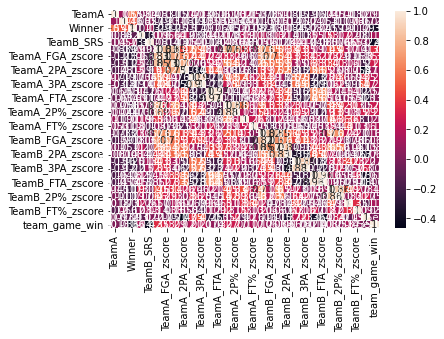

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
corrmtx=converted_season.corr()
sns.heatmap(corrmtx,annot=True)
plt.show()

In [63]:
training_set = converted_season.loc[converted_season["Year"] <= 2018] # training set 

testing_set = converted_season.loc[(converted_season["Year"] == 2019)] # testing set CHANGE THIS

print(len(testing_set))

testing_set.head()


32


,TeamA,TeamB,Winner,TeamA_SRS,TeamB_SRS,TeamA_FG_zscore,TeamA_FGA_zscore,TeamA_2P_zscore,TeamA_2PA_zscore,TeamA_3P_zscore,...,TeamB_3P_zscore,TeamB_3PA_zscore,TeamB_FT_zscore,TeamB_FTA_zscore,TeamB_FG%_zscore,TeamB_2P%_zscore,TeamB_3P%_zscore,TeamB_FT%_zscore,Year,team_game_win
0,12,53,12,0.709851,-1.606147,1.949629,1.320741,2.094006,0.542623,0.489724,...,0.675927,0.395988,-0.889213,-1.207277,0.293780,0.140931,0.517558,1.174393,2019,2.0
1,59,83,83,-0.770028,-0.427092,-1.605961,-0.868734,-0.695939,-0.464692,-1.959867,...,-1.154249,-0.289175,-0.392476,0.376734,-2.103398,-1.538640,-1.790761,-2.918627,2019,1.0
2,32,36,36,0.291783,-2.017023,-0.551816,-1.260119,-0.458324,-0.589242,-0.341847,...,0.182348,-0.274394,-0.572308,-0.598060,1.714265,1.741012,0.996409,0.464452,2019,1.0
3,62,68,62,-0.000355,-0.898120,-1.236185,-2.117061,-2.279128,-3.027442,1.128645,...,-1.309473,-0.876447,-1.615684,-1.082457,-1.021202,-0.441936,-1.241621,-1.539388,2019,2.0
4,26,5,26,0.409210,-1.746914,0.226582,1.007037,-0.090884,0.091227,0.562519,...,1.746479,1.423138,-0.871030,-1.041602,1.527556,1.772672,0.635841,0.341354,2019,2.0


In [64]:
training_set = training_set.drop(["Year"], axis=1) #drop year and type as they are not used for predictions only for data selection
testing_set = testing_set.drop(["Year"], axis=1)

X_both = training_set.append(testing_set, ignore_index=True)
Y_both = X_both["team_game_win"]
X_both = X_both.drop(["team_game_win"], axis=1)

X_train=training_set.drop(["team_game_win"],axis=1).values
X_test = testing_set.drop(["team_game_win"],axis=1).values

print(len(X_train))
print(len(X_test))
X_train[:5]



96
32


C:\Users\divys\AppData\Local\Temp\ipykernel_4368\135964952.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_both = training_set.append(testing_set, ignore_index=True)


array([[ 6.00000000e+01,  6.60000000e+01,  6.00000000e+01,
         3.27525146e-01, -1.95959605e+00,  5.67399596e-01,
        -9.73921667e-01, -1.28928007e-01, -1.67937317e+00,
         1.25940309e+00,  7.56869386e-01,  2.30540431e-02,
        -5.71219793e-01,  1.79991140e+00,  1.95016338e+00,
         1.06350375e+00,  2.93058202e+00, -3.72286084e-01,
        -6.02794614e-01, -7.66721791e-01, -7.53074732e-01,
         5.89948795e-01,  1.34443747e-01, -1.15663852e+00,
        -1.43383578e+00,  1.24154242e-01, -1.80789625e-01,
         1.11959506e+00,  1.47994617e+00],
       [ 6.20000000e+01,  1.00000000e+00,  1.00000000e+00,
        -1.32301543e-01,  4.31326013e-01,  6.41577564e-01,
        -2.19957964e-01,  1.25445544e-01, -9.10498740e-01,
         1.01376727e+00,  7.66905936e-01,  2.92257890e-01,
         4.07727904e-01,  1.42192866e+00,  1.61576606e+00,
         6.55234896e-01, -5.33762168e-01,  5.94700361e-01,
         3.20393109e-01,  7.27266614e-01,  2.42800937e-01,
        -1.08

In [65]:
Y_train=training_set["team_game_win"].values
Y_test = testing_set["team_game_win"].values
Y_train=Y_train.reshape(-1,1)
Y_test =Y_test.reshape(-1,1)

Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

Y_train

array([2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1.,
       1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2.,
       2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1.,
       2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2.])

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

SVM CODE

In [67]:
kernels = ["linear", "rbf", "poly"]
# CS = [0.1, 1, 10]
CS = [10]

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for C in CS:
    print("----------")
    print("C Value: ", C)
    svm_clf=SVC(C= C, gamma="auto", kernel="linear")
    svm_clf.fit(X_train,Y_train)
    Y_pred=svm_clf.predict(X_test)
    linear_ypred = Y_pred
    print("Precision: ", precision_score(Y_test, Y_pred), " | Recall: ", recall_score(Y_test, Y_pred), " | Accuracy: ", accuracy_score(Y_test, Y_pred), " | F1 Score: ", f1_score(Y_test, Y_pred))

----------
C Value:  10
Precision:  0.7692307692307693  | Recall:  0.8333333333333334  | Accuracy:  0.84375  | F1 Score:  0.8


In [69]:
for C in CS:
    print("----------")
    print("C Value: ", C)
    svm_clf=SVC(C= C, gamma="auto", kernel="rbf")
    svm_clf.fit(X_train,Y_train)
    Y_pred=svm_clf.predict(X_test)
    rbf_ypred = Y_pred
    print("Precision: ", precision_score(Y_test, Y_pred), " | Recall: ", recall_score(Y_test, Y_pred), " | Accuracy: ", accuracy_score(Y_test, Y_pred), " | F1 Score: ", f1_score(Y_test, Y_pred))

----------
C Value:  10
Precision:  0.7272727272727273  | Recall:  0.6666666666666666  | Accuracy:  0.78125  | F1 Score:  0.6956521739130435


In [70]:
for C in CS:
    print("----------")
    print("C Value: ", C)
    svm_clf=SVC(C= C, gamma="auto", kernel="poly")
    svm_clf.fit(X_train,Y_train)
    Y_pred=svm_clf.predict(X_test)
    print("Precision: ", precision_score(Y_test, Y_pred), " | Recall: ", recall_score(Y_test, Y_pred), " | Accuracy: ", accuracy_score(Y_test, Y_pred), " | F1 Score: ", f1_score(Y_test, Y_pred))

----------
C Value:  10
Precision:  0.625  | Recall:  0.4166666666666667  | Accuracy:  0.6875  | F1 Score:  0.5
